Importing Necessary Libraries

In [1]:
from PIL import Image
import os
import numpy as np
import cv2

Face_Detection Using OpenCv

In [5]:
main_folder_path = "/kaggle/input/face-verification/IIITB-FACES"

In [6]:
train_image_paths = []
train_label = []
test_label = []
test_image_paths = []
for folder in os.listdir(main_folder_path):
    count = 0
    category_path = os.path.join(main_folder_path, folder)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        
        if count <= 1:
            test_image_paths.append(image_path)
            test_label.append(folder)
        else:
            train_image_paths.append(image_path)
            train_label.append(folder)
        
        count += 1

Face Detection Using Haarcascade

In [8]:
# Create a folder to save the cropped images
output_folder = "C:/Users/ritti/OneDrive/Desktop/cropped_faces"
os.makedirs(output_folder, exist_ok=True)

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load and process each image
for i in range(len(train_image_paths)):
    # Load the image
    image = cv2.imread(train_image_paths[i])
    
    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    #print(type(faces))
    #print(faces.shape)
    
    # Crop and save each detected face
     # Check if faces is a tuple (handles the case where no faces are detected)
    new_folder = os.path.join(output_folder, str(train_label[i]))
    os.makedirs(new_folder, exist_ok=True)    
    
    if isinstance(faces, tuple):
        continue

    if faces.shape[0]>=1:
        x, y, w, h = faces[0]
        face_image = image[y:y+h, x:x+w]
        output_path = os.path.join(new_folder, f"face_{i+1}.jpg")
        cv2.imwrite(output_path, face_image)

Visualizing Detected Face

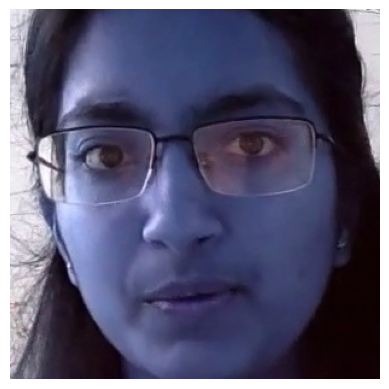

In [25]:
import matplotlib.pyplot as plt

# Load an image using OpenCV
image = cv2.imread("/kaggle/working/cropped_faces/IMT2013049.jpg")

# Convert BGR image to RGB format (Matplotlib expects RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()